In [1]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import numpy as np 
import pandas as pd

def preprocess(test):
    #ENCODING THE CATEGORICAL DATA
    le = LabelEncoder()
    test['cp_type'] = le.fit_transform(test['cp_type'])
    test['cp_time'] = le.fit_transform(test['cp_time'])
    test['cp_dose'] = le.fit_transform(test['cp_dose'])

    gene_features = []
    cell_features = []
    for i in test.columns:
        if i.startswith('g-'):
            gene_features.append(i)
        if i.startswith('c-'):
            cell_features.append(i)

    encoder = load_model('encoders_gene_features.h5')
    test_gene_features = encoder.predict(test[gene_features])

    encoder = load_model('encoders_cell_features.h5')
    test_cell_features = encoder.predict(test[cell_features])

    x_1_test = np.hstack((test['cp_type'].values.reshape(-1,1), test['cp_time'].values.reshape(-1, 1), test['cp_dose'].values.reshape(-1, 1),
                        test_gene_features, test_cell_features))

    return x_1_test

data = pd.read_csv('/home/abdelmoneim/التنزيلات/test_features.csv')
new = preprocess(data)

/home/abdelmoneim/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-05-20 20:23:26.993028: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 20:23:27.073988: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 20:23:27.212698: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 20:23:28.645383: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [2]:
new.shape

(1, 498)

In [3]:
new[0]

array([0.        , 0.        , 0.        , 1.41595268, 1.03241861,
       0.91615736, 0.90135229, 1.22867906, 1.45236123, 1.41928482,
       0.15670544, 0.14423254, 1.07972646, 1.91354489, 1.53162968,
       1.45025861, 1.06797624, 0.13060898, 0.56277907, 0.40082133,
       0.65078223, 0.3188661 , 1.49605525, 1.3412534 , 1.20293021,
       0.51014453, 1.23108673, 0.84870309, 0.60585821, 0.94818318,
       1.33572638, 0.39381629, 0.76493764, 1.34639835, 0.65856284,
       1.33064663, 0.43180817, 0.36345428, 0.68582052, 0.70744669,
       0.76645398, 0.58220339, 0.51749861, 0.7980718 , 1.09849691,
       1.69990432, 0.90444219, 0.76658958, 1.0999409 , 1.17235601,
       0.78633106, 1.45351899, 0.57283777, 0.74154145, 0.63557339,
       0.47745255, 0.61498684, 0.77605402, 0.08564556, 0.96023577,
       1.17365813, 1.2622    , 1.58231187, 1.01434219, 0.40728202,
       0.33967102, 1.06956983, 0.54403168, 1.16551387, 1.74301016,
       1.56242192, 1.01045275, 0.93952817, 0.94592267, 1.17898

In [21]:
import os

directory = '/home/abdelmoneim/سطح المكتب/graduation project/my work/autoencoder + neural network/models'  # replace with your directory path
file_paths = []

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    file_paths.append(file_path)

In [24]:
len(file_paths)

15

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import backend
def logloss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # convert y_true to float32
    y_pred = tf.clip_by_value(y_pred,0.0005, 0.9995)
    return -backend.mean(y_true * backend.log(y_pred) + (1 - y_true) * backend.log(1 - y_pred))

In [33]:
y_pred = np.zeros((new.shape[0], 206))
for i in file_paths:

    model = load_model(i)
    y_pred += model.predict(new) / (15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [34]:
p_min = 0.0005
p_max = 0.9995

# Generate submission file, Clip Predictions
prediction_sub = pd.DataFrame()

sub = pd.read_csv('/home/abdelmoneim/سطح المكتب/graduation project/dataset/sample_submission.csv')
sub.iloc[:new.shape[0],1:] = np.clip(y_pred,p_min,p_max)
prediction_sub = sub.iloc[ : new.shape[0], : ]

# Save Submission
prediction_sub.to_csv('submission.csv', index=False)
prediction_sub.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.00174,0.001816,0.001505,0.013377,0.025516,0.005219,0.004099,0.004882,0.000722,...,0.000957,0.001434,0.003583,0.00313,0.001923,0.000968,0.001483,0.002489,0.002123,0.002223


#### visualization output

In [28]:
import pandas as pd
a = prediction_sub.sample()

In [29]:
a['raf_inhibitor']

0    0.000714
Name: raf_inhibitor, dtype: float64

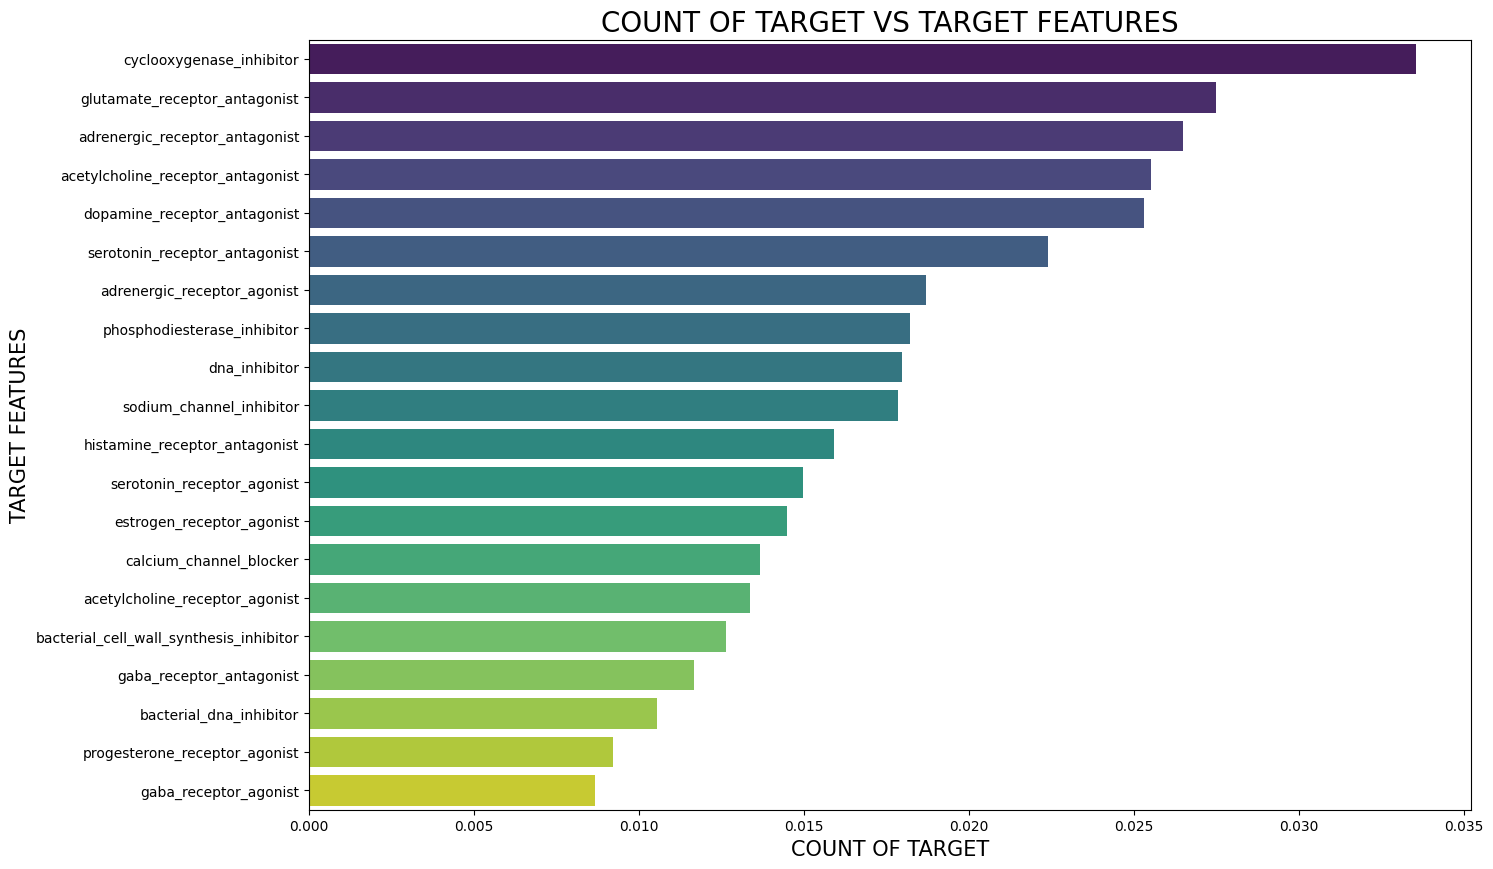

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = list(a.columns.values)
sig_id_values  = x_axis[2:]
count_of_target = a.iloc[:,2:].sum().values
dct =dict(zip(sig_id_values, count_of_target)) 
sorted_dict = dict(sorted(dct.items(), key=lambda i: i[1], reverse=True))

#BARPLOT WITH THE TOP 20 TARGETS

plt.figure(figsize=(15, 10))

# Create the bar plot with the "viridis" color palette
sns.barplot(x=list(sorted_dict.values())[:20], y=list(sorted_dict.keys())[:20], palette="viridis")

# Set the title and labels
plt.title('COUNT OF TARGET VS TARGET FEATURES', fontsize=20)
plt.xlabel('COUNT OF TARGET', fontsize=15)
plt.ylabel('TARGET FEATURES', fontsize=15)

# Show the plot
plt.show()

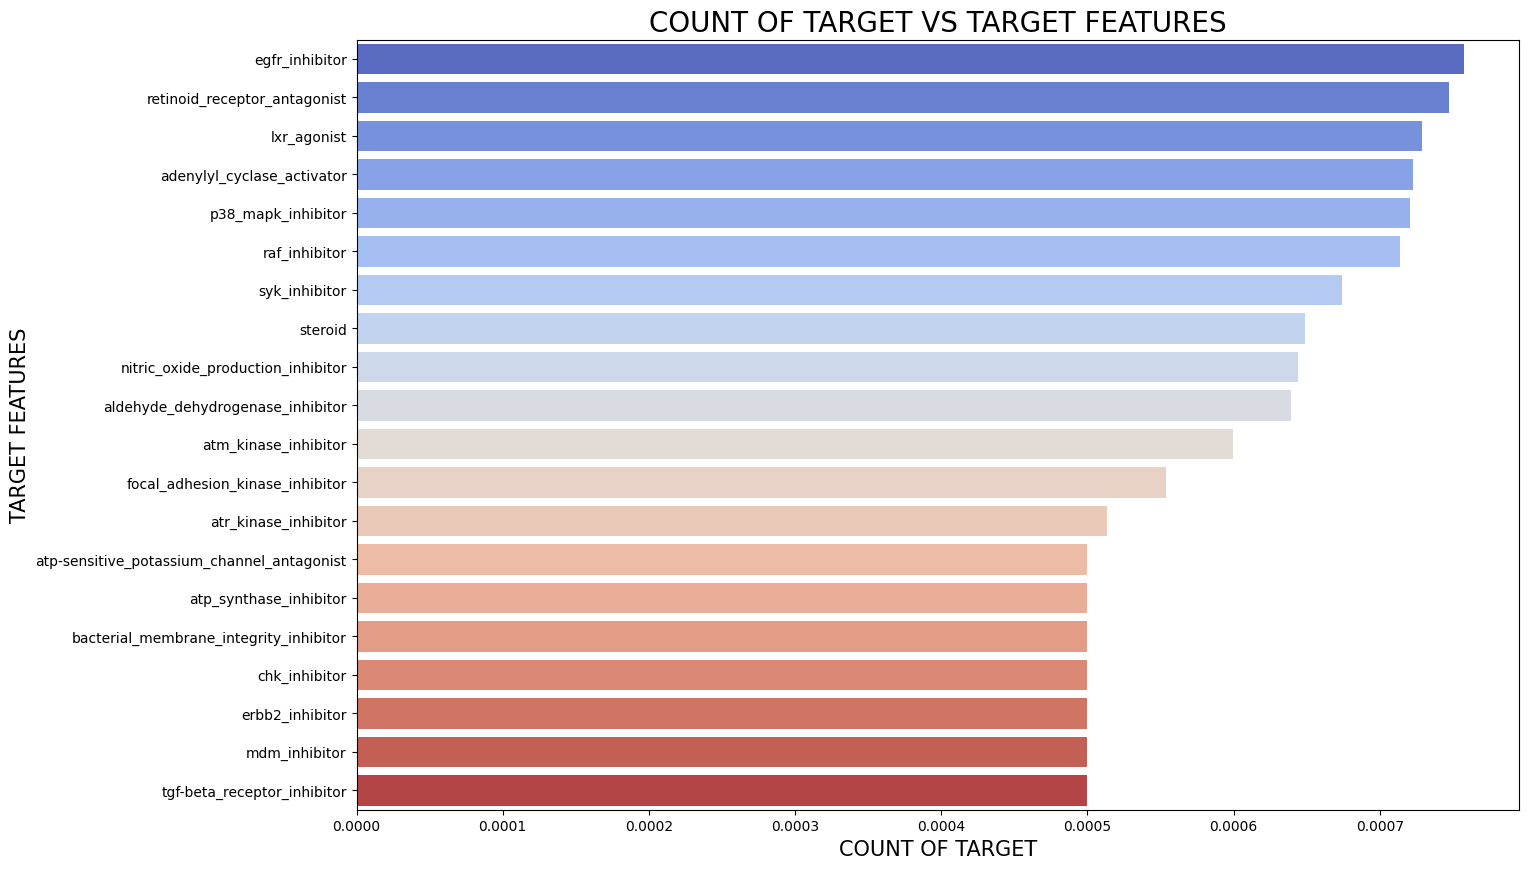

In [31]:
#BARPLOT WITH THE lowest 20 TARGETS
plt.figure(figsize=(15, 10))
sns.barplot(x=list(sorted_dict.values())[-20:], y=list(sorted_dict.keys())[-20:], palette="coolwarm")

# Set the title and labels
plt.title('COUNT OF TARGET VS TARGET FEATURES', fontsize=20)
plt.xlabel('COUNT OF TARGET', fontsize=15)
plt.ylabel('TARGET FEATURES', fontsize=15)

# Show the plot
plt.show()

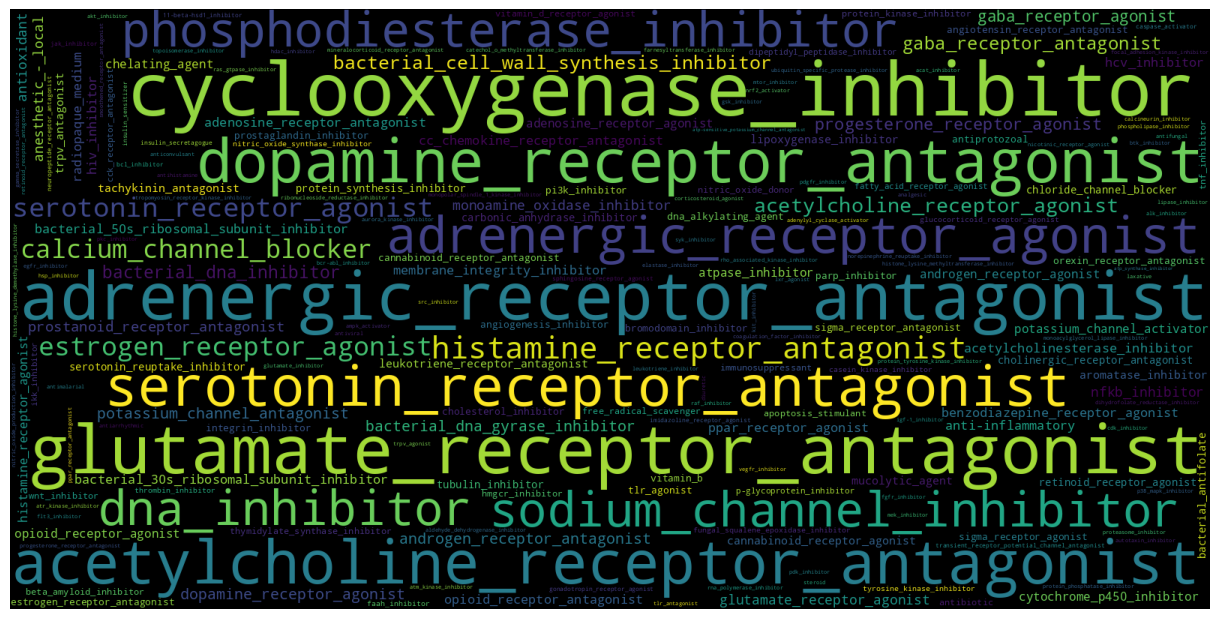

In [32]:
# WORD CLOUD FOR THE TARGETS IN 

from wordcloud import WordCloud
wrd_cloud_dict=dict(sorted_dict.items())
word_cloud = WordCloud(width = 1600, height = 800,).generate_from_frequencies(wrd_cloud_dict)
plt.figure(figsize = (12, 8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [1]:
import pandas as pd
data = pd.read_csv('submission.csv')
data.sample()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
2648,id_aa29355ff,0.001046,0.001255,0.001855,0.015483,0.021332,0.005664,0.004534,0.006082,0.001009,...,0.000866,0.000959,0.003247,0.001862,0.002169,0.000778,0.001842,0.002495,0.001295,0.002403


In [7]:
data.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,...,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,0.001244,0.001375,0.001514,0.011334,0.017761,0.004453,0.003354,0.005179,0.000783,0.014934,...,0.000746,0.001310,0.003088,0.015660,0.003005,0.000741,0.005650,0.001714,0.001796,0.001993
std,0.000585,0.000612,0.000484,0.004734,0.007764,0.001844,0.001322,0.002058,0.000699,0.007504,...,0.000189,0.004265,0.001016,0.103755,0.002532,0.000197,0.023911,0.000578,0.002075,0.000625
min,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,...,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500
25%,0.000762,0.000879,0.001277,0.009657,0.014758,0.003547,0.002813,0.004398,0.000500,0.010872,...,0.000608,0.000730,0.002758,0.001803,0.001899,0.000570,0.001748,0.001448,0.000959,0.001791
50%,0.001186,0.001332,0.001513,0.012251,0.020052,0.004966,0.003549,0.005463,0.000640,0.015942,...,0.000714,0.000949,0.003281,0.002771,0.002562,0.000725,0.002824,0.001772,0.001464,0.002107
75%,0.001619,0.001819,0.001775,0.014337,0.022991,0.005744,0.004196,0.006404,0.000864,0.019787,...,0.000851,0.001255,0.003729,0.004149,0.003366,0.000875,0.004454,0.002080,0.002148,0.002378
max,0.004111,0.003463,0.007384,0.025844,0.098390,0.010204,0.009006,0.017285,0.023754,0.081527,...,0.001998,0.195777,0.005772,0.994443,0.062395,0.002475,0.737458,0.003665,0.075237,0.004505


In [9]:
max(min(0.994443, (1-10**-15)), 10**-15)

0.994443